# Aprendizaje automático y aplicaciones

---
$A^3$ @ FI-UNER : 2021

In [1]:
# Imports generales
from matplotlib import pyplot as plt 
import numpy as np 

## K-medias y métricas intrínsecas

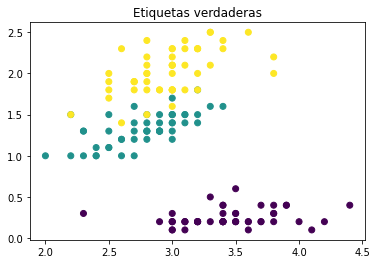

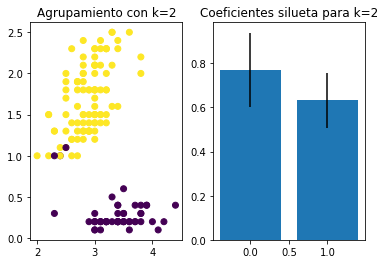

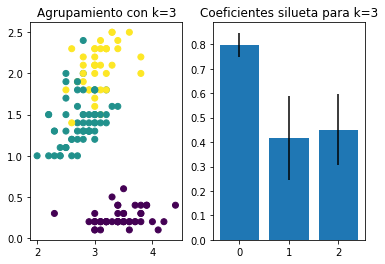

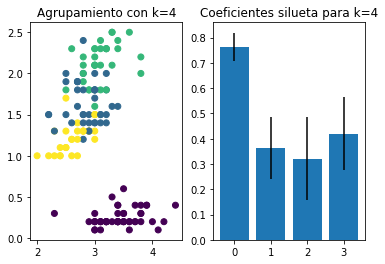

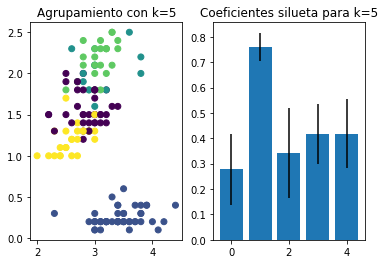

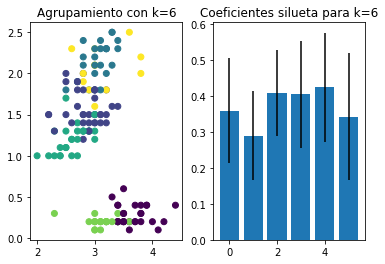

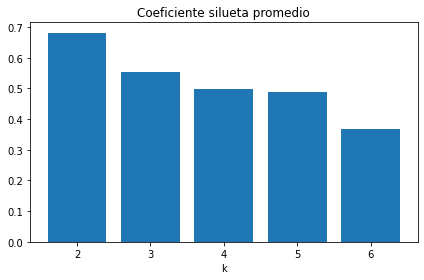

In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()
X = iris["data"]
y = iris["target"]

plt.figure()
plt.scatter(X[:, 1], X[:, 3], c=y)
plt.title("Etiquetas verdaderas")

ks = np.arange(2, 7)
silueta, db = [], []

for k in ks:
    clusters = KMeans(n_clusters=k).fit_predict(X)
    silueta.append(silhouette_score(X, clusters))
   
    fig, ax = plt.subplots(1,2)
    ax[0].scatter(X[:, 1], X[:, 3], c=clusters)
    ax[0].set_title(f"Agrupamiento con k={k}")

    silhouette_samples_score = silhouette_samples(X, clusters)
    sbar = [silhouette_samples_score[clusters==c].mean() for c in np.unique(clusters)]
    serr = [silhouette_samples_score[clusters==c].std() for c in np.unique(clusters)]
    ax[1].bar(np.unique(clusters), sbar, yerr=serr)    
    ax[1].set_title(f"Coeficientes silueta para k={k}")


plt.figure()
plt.bar(ks, silueta)
plt.title("Coeficiente silueta promedio")

plt.xlabel("k")
plt.tight_layout()

# Conclusión
Del análisis del coeficiente de silueta vemos que la elección de k=2 (2 grupos) es la más conveniente. Esto resulta evidente al ver la distribución del dataset. Es importante tener en cuenta que el agrupamiento y la clasificación son tareas diferentes y en muchos casos arrojan etiquetas que no son comparables o intercambiables entre sí  